#  **Data Preprocessing**


Extract historical financial data from yfinance using pynance for :

- TSLA provides potential high returns with high volatility.
- BND contributes stability and low risk.
- SPY offers diversified, moderate-risk market exposure.


First, import required libraries and python script modules

In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

In [4]:
# Create instance of DataProcessor
processor = DataPreprocessor(logger=logger)

**Get yfinance historical data**

In [6]:

# Define start and end data
start_date = '2015-01-01' # Adjust the date if needed
end_date = '2024-12-31' # Adjust the date if needed
# Define symbols
symbols = ['TSLA', 'BND', 'SPY']
# Get the data
# Uncomment below line and run the cell to fetch the yfinance data

In [8]:
processor.get_data(start_date, end_date, symbols)

Fetching data for TSLA from 2015-01-01 to 2024-12-31...
Data for TSLA saved to '../data\TSLA.csv'.
Fetching data for BND from 2015-01-01 to 2024-12-31...
Data for BND saved to '../data\BND.csv'.
Fetching data for SPY from 2015-01-01 to 2024-12-31...
Data for SPY saved to '../data\SPY.csv'.


{'TSLA': '../data\\TSLA.csv',
 'BND': '../data\\BND.csv',
 'SPY': '../data\\SPY.csv'}

**Load the data**

In [ ]:
# load TSLA data
tsla = processor.load_data('TSLA')
# Load BND data
bnd = processor.load_data('BND')
# Load PSY data
spy = processor.load_data('SPY')

**Explore the data**

In [10]:
tsla.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,423.790,427.9300,402.5400,403.84,76825121
2024-12-30,419.400,427.0000,415.7500,417.41,64941012
2024-12-27,449.520,450.0000,426.5000,431.66,82666821
2024-12-26,465.160,465.3299,451.0200,454.13,76651210
2024-12-24,435.900,462.7800,435.1400,462.28,59551750
2024-12-23,431.000,434.5100,415.4112,430.60,72698055
2024-12-20,425.505,447.0800,417.6400,421.06,132216176
2024-12-19,451.880,456.3600,420.0200,436.17,118566146
2024-12-18,466.495,488.5399,427.0100,440.13,149340788


In [11]:
# Understand the data of tsla

pd.DataFrame(processor.inspect_data(tsla))

,data_types,missing_values,duplicate_rows
Open,float64,0,0
High,float64,0,0
Low,float64,0,0
Close,float64,0,0
Volume,int64,0,0


In [12]:
# Explore the first few rows of bnd
bnd.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,72.0900,72.1700,71.87500,71.91,8724265.0
2024-12-30,71.9000,72.0799,71.90000,72.03,8054495.0
2024-12-27,71.8900,71.9290,71.74000,71.75,9019079.0
2024-12-26,71.6300,71.9200,71.63000,71.90,8714524.0
2024-12-24,71.6501,71.8500,71.62000,71.85,4185260.0
2024-12-23,72.1300,72.2100,71.94351,71.98,7605461.0
2024-12-20,72.3000,72.4050,72.19000,72.21,6696387.0
2024-12-19,72.0400,72.1200,71.88000,71.99,7672820.0
2024-12-18,72.7600,72.8200,72.18000,72.19,7962662.0


In [13]:
# Understand the data of bnd
pd.DataFrame(processor.inspect_data(bnd))

,data_types,missing_values,duplicate_rows
Open,float64,0,0
High,float64,0,0
Low,float64,0,0
Close,float64,0,0
Volume,float64,0,0


In [14]:
# Explore the first few rows of spy
spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,589.905,590.6399,584.4200,586.08,57052654.0
2024-12-30,587.890,591.7400,584.4100,588.22,56578757.0
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0
2024-12-23,590.890,595.3000,587.6610,594.69,57635828.0
2024-12-20,581.770,595.7500,580.9100,591.15,125716674.0
2024-12-19,591.360,593.0000,585.8500,586.10,85919452.0
2024-12-18,603.980,606.4050,585.8900,586.28,108248729.0


In [15]:
# Understand the data of spy
pd.DataFrame(processor.inspect_data(spy))

,data_types,missing_values,duplicate_rows
Open,float64,0,0
High,float64,0,0
Low,float64,0,0
Close,float64,0,0
Volume,float64,0,0


In [16]:
# Shape of the data
tsla.shape, bnd.shape, spy.shape

((2516, 5), (2516, 5), (2516, 5))

**Simple Summary Statistics**

- Understand the distributions

In [17]:
# analyze the basic statistics of tsla
pd.DataFrame(processor.analyze_data(tsla))

,mean,median,std_dev,missing_values
Open,1.157035e+02,2.841365e+01,1.143137e+02,0
High,1.182977e+02,2.880585e+01,1.169455e+02,0
Low,1.129867e+02,2.735000e+01,1.114850e+02,0
Close,1.156793e+02,2.850565e+01,1.142265e+02,0
Volume,1.115986e+08,9.233699e+07,7.443890e+07,0


In [18]:
# analyze the basic statistics of bnd
pd.DataFrame(processor.analyze_data(bnd))

,mean,median,std_dev,missing_values
Open,7.524102e+01,7.333250e+01,4.943419e+00,0
High,7.534659e+01,7.343290e+01,4.944907e+00,0
Low,7.512529e+01,7.320830e+01,4.937775e+00,0
Close,7.523730e+01,7.333100e+01,4.942553e+00,0
Volume,4.393031e+06,3.950846e+06,2.768242e+06,0


In [19]:
# analyze the basic statistics of spy
pd.DataFrame(processor.analyze_data(spy))

,mean,median,std_dev,missing_values
Open,3.223852e+02,2.855180e+02,1.164724e+02,0
High,3.241322e+02,2.862475e+02,1.170510e+02,0
Low,3.204834e+02,2.844430e+02,1.158129e+02,0
Close,3.224328e+02,2.854940e+02,1.164768e+02,0
Volume,9.294495e+07,8.044111e+07,5.086759e+07,0


**Detect Outliers**

- understand the data point that are far away from the clustered data points
- Visualize the detected outliers

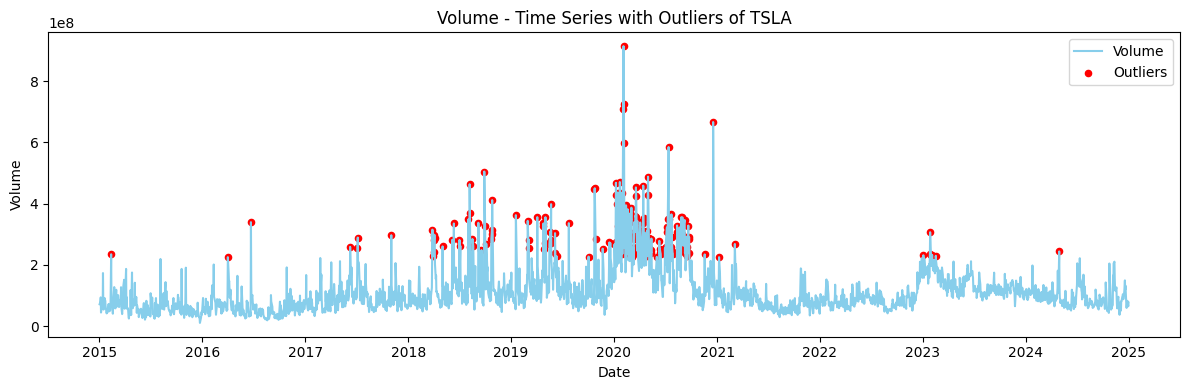

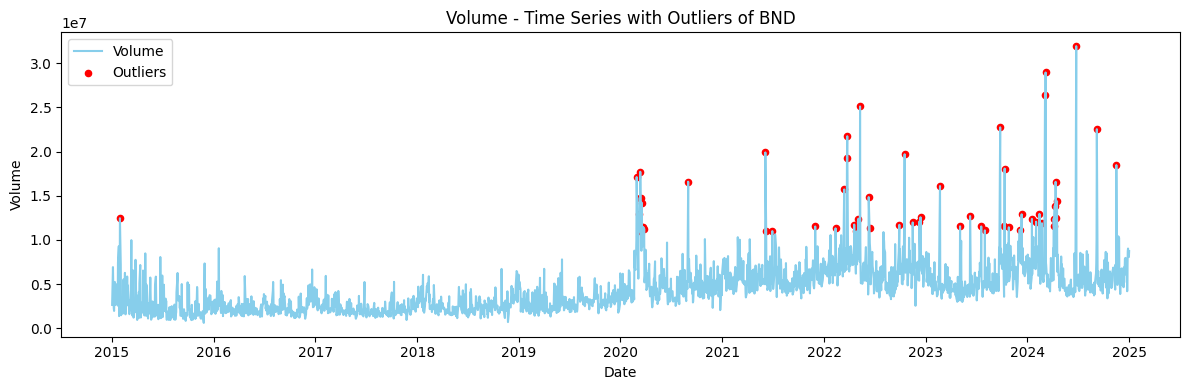

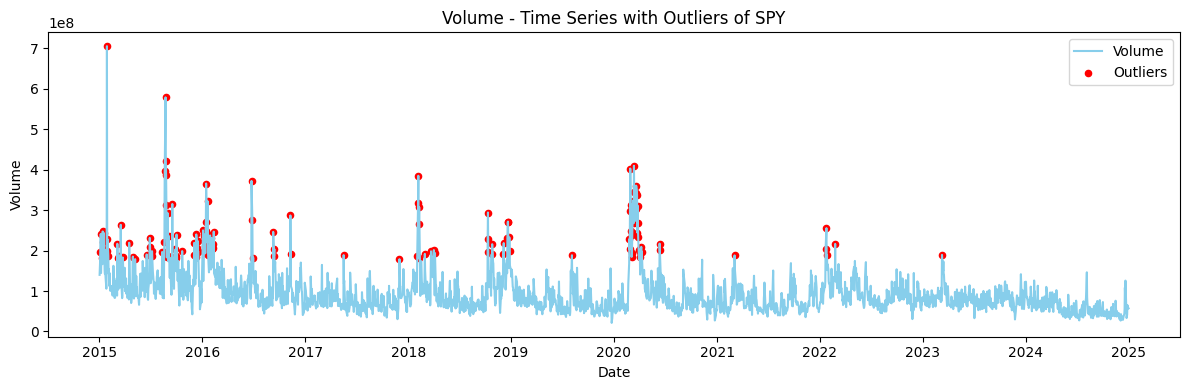

In [20]:
# Detect outliers of TSLA
tsla_outliers = processor.detect_outliers(tsla)
processor.plot_outliers(tsla, tsla_outliers, 'TSLA')
# Detect outliers of BND
bnd_outliers = processor.detect_outliers(bnd)
processor.plot_outliers(bnd, bnd_outliers, 'BND')
# Detect outliers of SPY
spy_outliers= processor.detect_outliers(spy)
processor.plot_outliers(spy, spy_outliers, 'SPY')

**Handle Outliers**

- Interpolate outliers of detected variables in each dataset

In [21]:
# Define dictionary for stock data for TSLA, BND, SPY
data_dict = {
    'TSLA': tsla,  
    'BND': bnd,    
    'SPY': spy     
}

# Outliers dictionary where each DataFrame has boolean values indicating outliers
outliers_dict = {
    'TSLA': tsla_outliers,  # Boolean DataFrame indicating TSLA outliers
    'BND': bnd_outliers,    # Boolean DataFrame indicating BND outliers
    'SPY': spy_outliers     # Boolean DataFrame indicating SPY outliers
}

# Call the `handle_outliers` function
cleaned_data_dict = processor.handle_outliers(data_dict, outliers_dict)

Outliers handled for TSLA by setting to NaN and filling with interpolation.
Outliers handled for BND by setting to NaN and filling with interpolation.
Outliers handled for SPY by setting to NaN and filling with interpolation.


In [22]:
# Obtain cleanned data
tsla_data = cleaned_data_dict['TSLA']
bnd_data = cleaned_data_dict['BND']
spy_data = cleaned_data_dict['SPY']

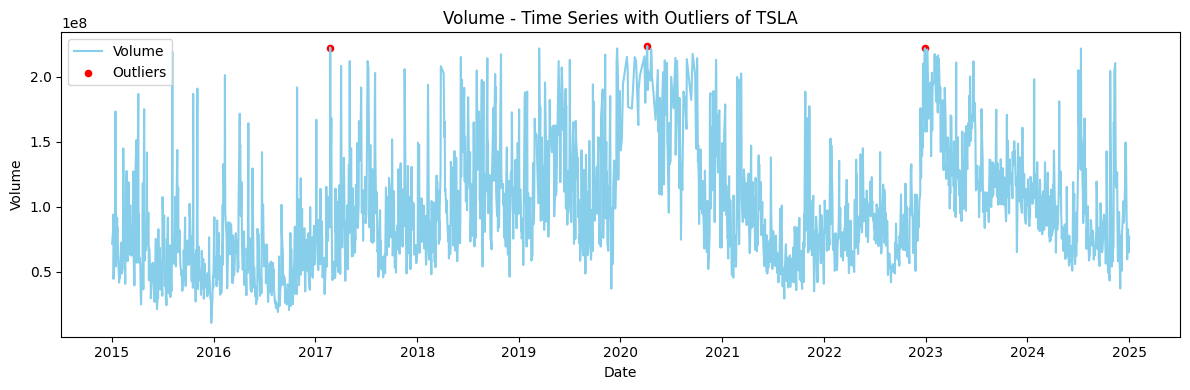

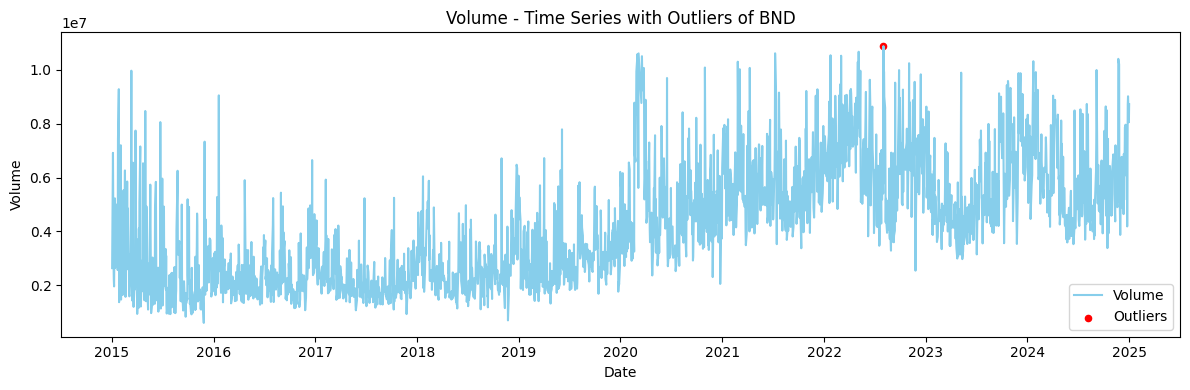

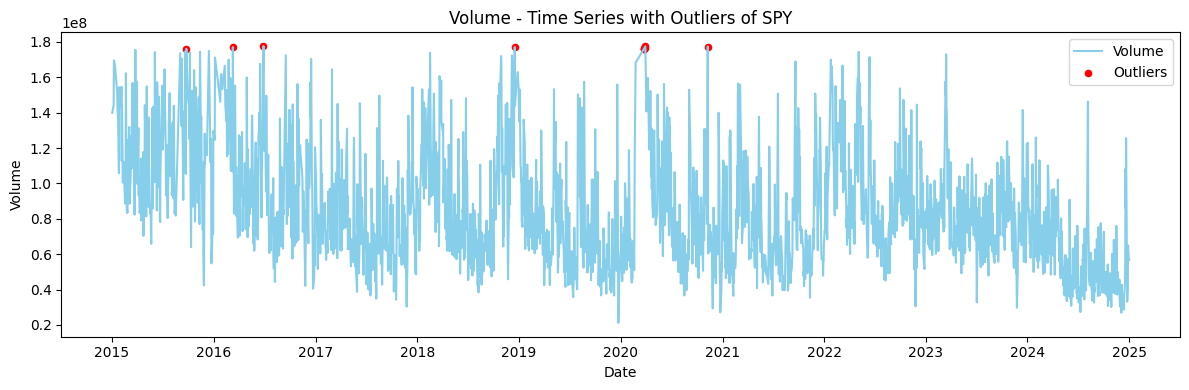

In [23]:
# Confirm the ourliers are handled by detecting again
# Detect outliers of TSLA
tsla_outliers = processor.detect_outliers(tsla_data)
processor.plot_outliers(tsla_data, tsla_outliers, 'TSLA')
# Detect outliers of BND
bnd_outliers = processor.detect_outliers(bnd_data)
processor.plot_outliers(bnd_data, bnd_outliers, 'BND')
# Detect outliers of SPY
spy_outliers= processor.detect_outliers(spy_data)
processor.plot_outliers(spy_data, spy_outliers, 'SPY')

In [24]:
# Save Cleaned data
tsla_data.to_csv('../data/tsla_cleaned.csv')
bnd_data.to_csv('../data/bnd_cleaned.csv')
spy_data.to_csv('../data/spy_cleaned.csv')